# Data Project - Stock Market Analysis


In this project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior?

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
!pip install -q yfinance

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('whitegrid')
# plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from pandas.testing import assert_frame_equal

# For time stamps
from datetime import datetime

In [8]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

import yfinance as yf

#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:
    # Set DataFrame as the Stock Ticker
    # Use yfinance to download data
    globals()[stock] = yf.download(stock, start=start, end=end)

/tmp/ipython-input-3091415468.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3091415468.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3091415468.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3091415468.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


**Quick note:**
- Using `globals()` is a sloppy way of setting the DataFrame names, but its simple
- Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [10]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.sort_index(inplace=True)
df.tail(10)

Price,Close,High,Low,Open,Volume,company_name,Close,High,Low,Open,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,GOOG,GOOG,GOOG,GOOG,...,MSFT,MSFT,MSFT,MSFT,MSFT,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2025-10-01,255.449997,258.790009,254.929993,255.039993,48713900.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-10-01,NaN,NaN,NaN,NaN,NaN,GOOGLE,245.539993,247.149994,239.199997,241.179993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-10-02,NaN,NaN,NaN,NaN,NaN,MICROSOFT,NaN,NaN,NaN,NaN,...,515.739990,521.599976,510.679993,517.640015,21222900.0,NaN,NaN,NaN,NaN,NaN
2025-10-02,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,222.410004,222.809998,218.949997,221.009995,41258600.0
2025-10-02,NaN,NaN,NaN,NaN,NaN,GOOGLE,246.429993,247.634995,243.104996,245.639999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-10-02,257.130005,258.179993,254.149994,256.579987,42630200.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-10-03,NaN,NaN,NaN,NaN,NaN,GOOGLE,246.449997,247.117996,242.470001,245.229996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-10-03,258.019989,259.239990,253.949997,254.669998,49107000.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Summary Stats
AAPL.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,223.714001,225.957100,221.147051,223.351664,5.382071e+07
std,17.612110,17.088269,17.793367,17.505300,2.332902e+07
min,171.998978,189.875218,168.796824,171.530131,2.323470e+07
25%,209.774426,211.763712,207.578697,209.734468,3.982195e+07
50%,226.642944,228.561284,223.996302,226.173541,4.712745e+07
75%,236.440762,238.832504,233.172259,236.020110,5.681858e+07
max,258.103729,259.239990,256.718662,257.276679,1.843959e+08


In [12]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-10-04 to 2025-10-03
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     250 non-null    float64
 1   (High, AAPL)      250 non-null    float64
 2   (Low, AAPL)       250 non-null    float64
 3   (Open, AAPL)      250 non-null    float64
 4   (Volume, AAPL)    250 non-null    int64  
 5   (company_name, )  250 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


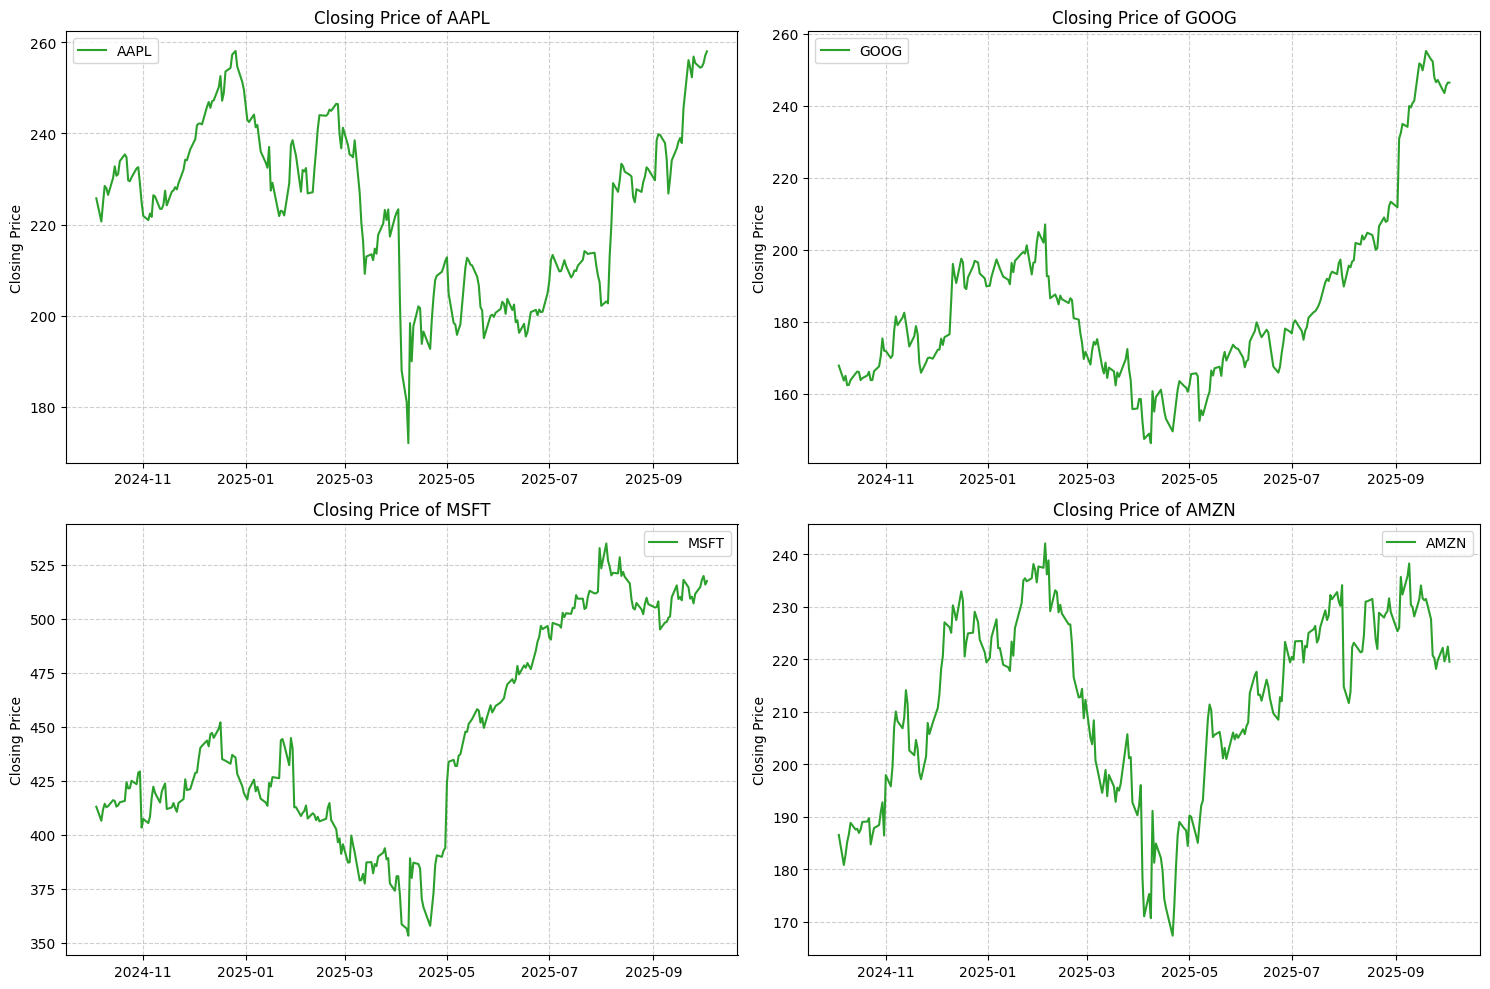

In [35]:
# Determine how many companies you have
n_companies = len(company_list)

# Dynamically decide subplot grid: 2 columns, enough rows
n_cols = 2
n_rows = (n_companies + 1) // n_cols  # rounds up if odd number

plt.figure(figsize=(15, 5 * n_rows))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for i, company in enumerate(company_list, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.plot(company['Close'], label=f"{tech_list[i - 1]}", color='tab:green')
    plt.ylabel('Closing Price', fontsize=10)
    plt.title(f"Closing Price of {tech_list[i - 1]}", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()

plt.show()

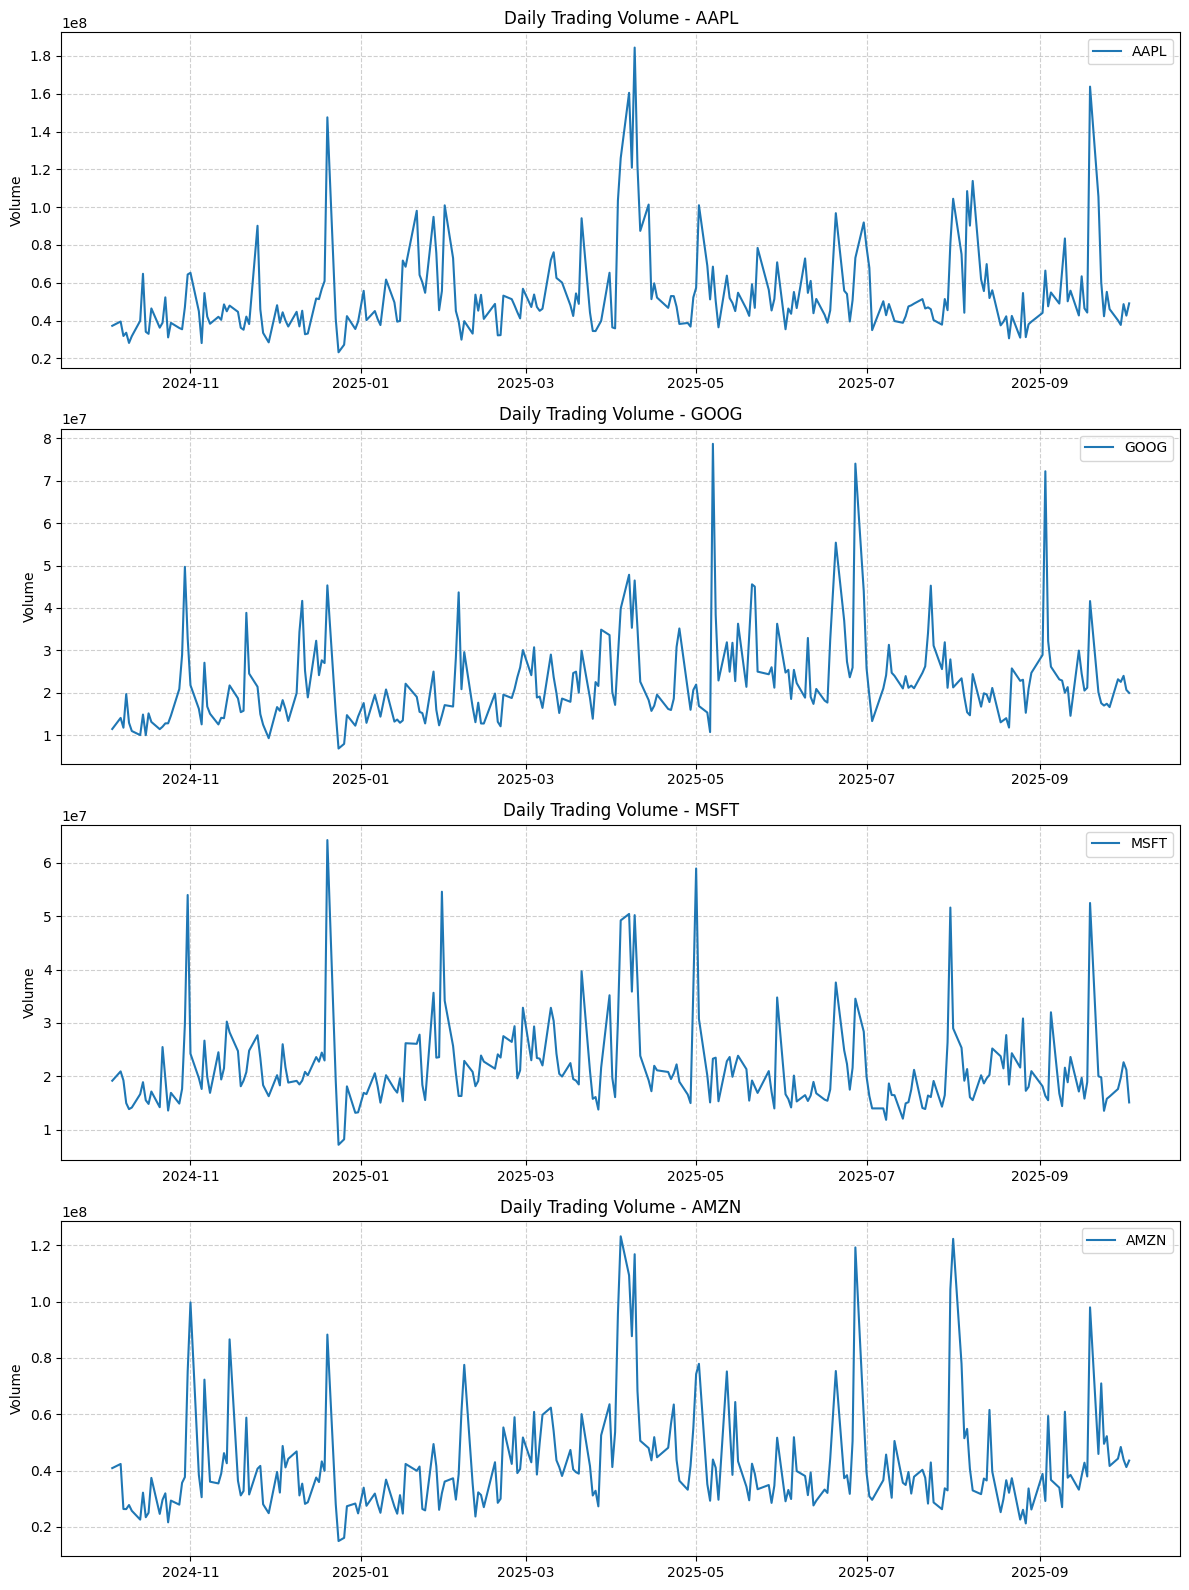

In [34]:
import matplotlib.pyplot as plt

# Adjust the number of rows dynamically based on company_list length
n_companies = len(company_list)

plt.figure(figsize=(12, 4 * n_companies))  # adjust height automatically
plt.subplots_adjust(hspace=0.4)  # add space between plots

for i, company in enumerate(company_list, 1):
    plt.subplot(n_companies, 1, i)
    plt.plot(company['Volume'], label=f"{tech_list[i - 1]}", color='tab:blue')
    plt.ylabel('Volume', fontsize=10)
    plt.title(f"Daily Trading Volume - {tech_list[i - 1]}", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()

plt.show()


Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

In [28]:
print(company.columns)


MultiIndex([(         'Close', 'AMZN'),
            (          'High', 'AMZN'),
            (           'Low', 'AMZN'),
            (          'Open', 'AMZN'),
            (        'Volume', 'AMZN'),
            (  'company_name',     ''),
            ('MA for 10 days',     ''),
            ('MA for 20 days',     ''),
            ('MA for 50 days',     '')],
           names=['Price', 'Ticker'])


In [29]:
ma_day = [10, 20, 50]

In [30]:
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        # Safely choose the correct price column
        price_col = 'Adj Close' if 'Adj Close' in company.columns else 'Close'
        company[column_name] = company[price_col].rolling(ma).mean()


In [31]:
print(GOOG.columns)

MultiIndex([(         'Close', 'GOOG'),
            (          'High', 'GOOG'),
            (           'Low', 'GOOG'),
            (          'Open', 'GOOG'),
            (        'Volume', 'GOOG'),
            (  'company_name',     ''),
            ('MA for 10 days',     ''),
            ('MA for 20 days',     ''),
            ('MA for 50 days',     '')],
           names=['Price', 'Ticker'])


Now let's go ahead and plot all the additional Moving Averages

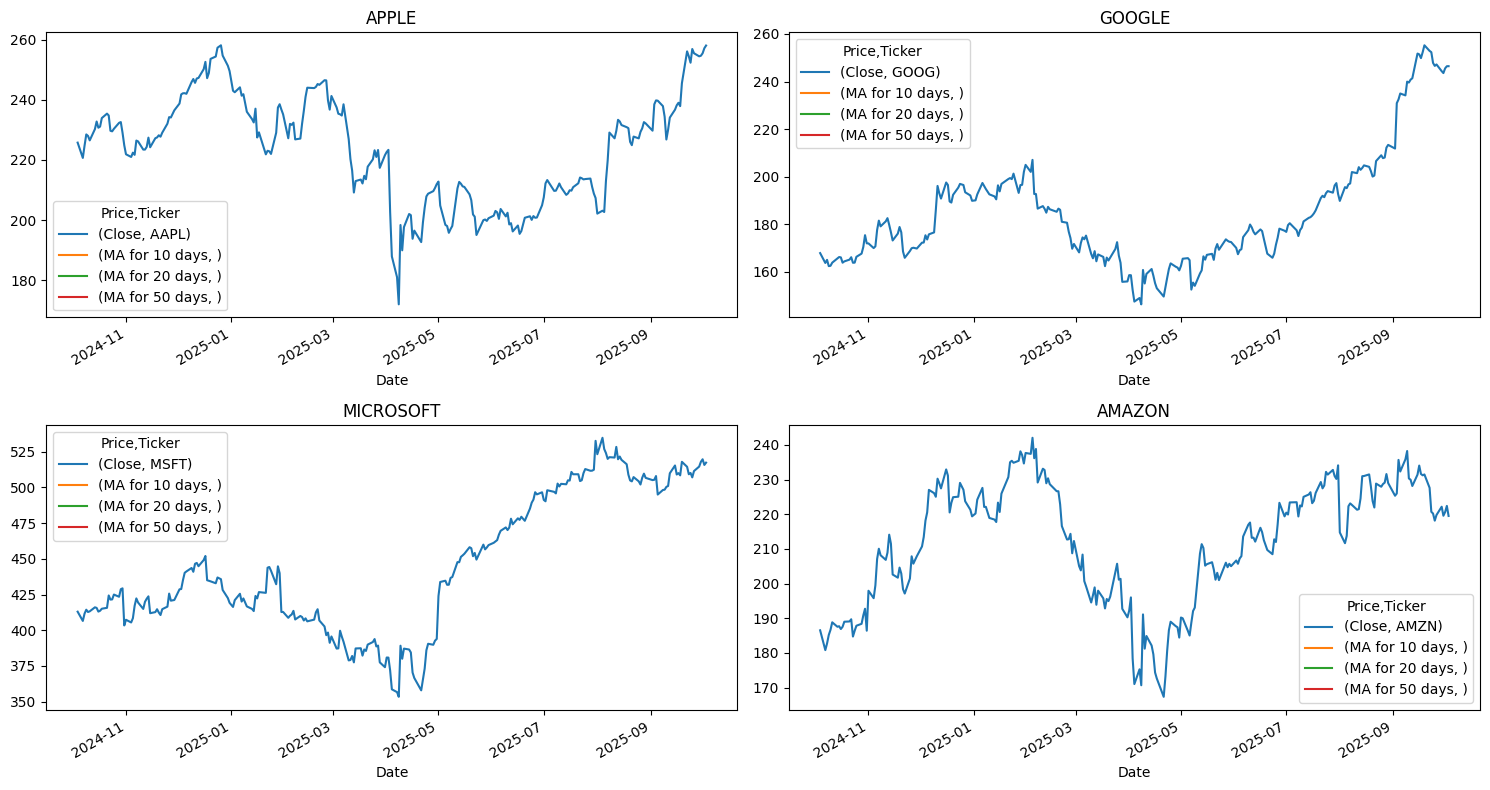

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

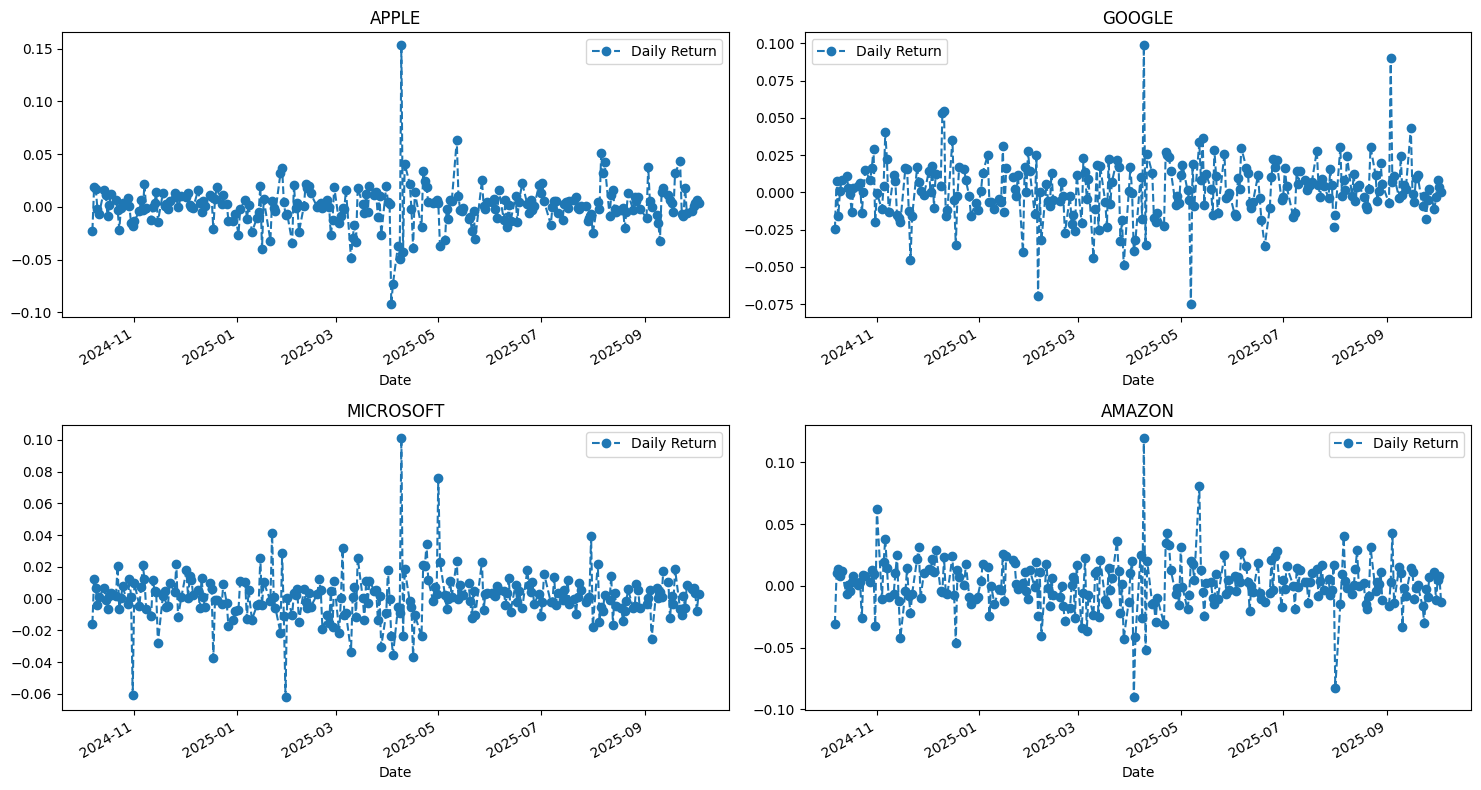

In [36]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

/tmp/ipython-input-586965654.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(company['Daily Return'].dropna(), bins=100)
/tmp/ipython-input-586965654.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(company['Daily Return'].dropna(), bins=100)
/tmp/ipython-input-586965654.py:6: UserWarning

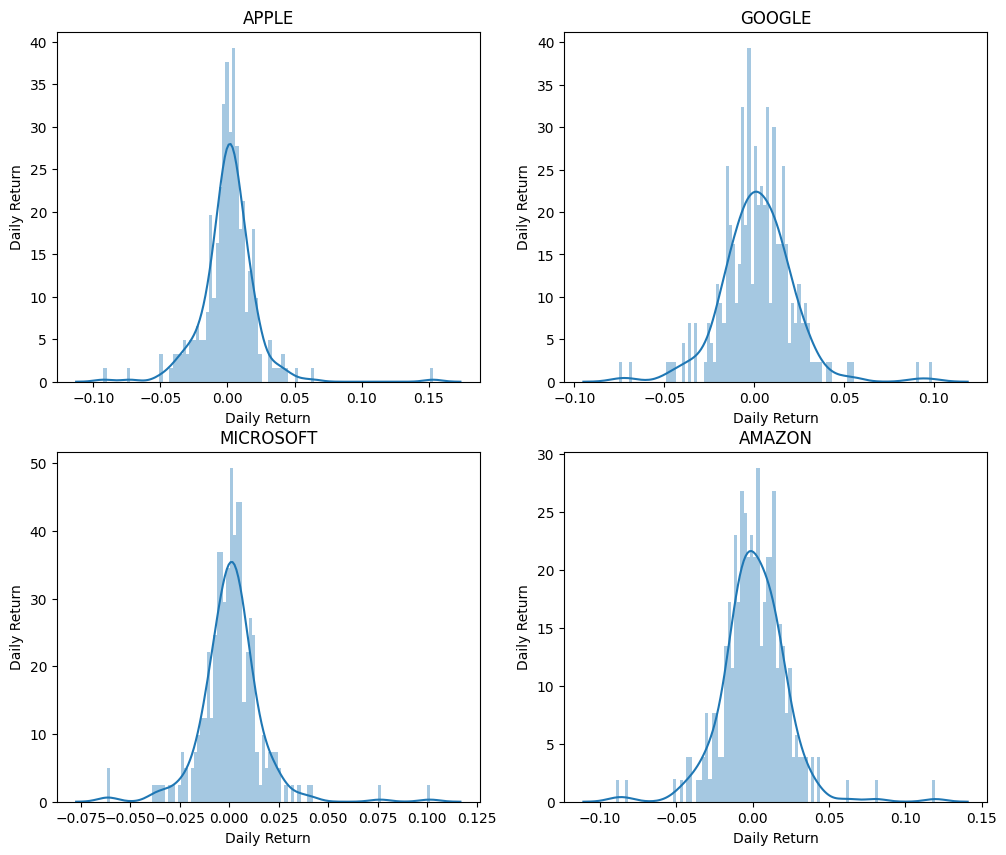

In [37]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 10))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

# Could have also done:
# AAPL['Daily Return'].hist()

# 4. What was the correlation between different stocks closing prices?

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [39]:
# Grab all the closing prices for the tech stock list into one DataFrame
# Use yfinance to download data for all stocks in the list
closing_df = yf.download(tech_list, start=start, end=end)['Close']

# Let's take a quick look
closing_df.head()

/tmp/ipython-input-112690654.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  closing_df = yf.download(tech_list, start=start, end=end)['Close']
[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-10-04,225.749359,186.509995,167.825470,412.959686
2024-10-07,220.663040,180.800003,163.673660,406.488312
2024-10-08,224.724136,182.720001,164.977936,411.619751
2024-10-09,228.476669,185.169998,162.349442,414.349243
2024-10-10,227.978989,186.649994,162.468918,412.741333


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [40]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-10-04,NaN,NaN,NaN,NaN
2024-10-07,-0.022531,-0.030615,-0.024739,-0.015671
2024-10-08,0.018404,0.010619,0.007969,0.012624
2024-10-09,0.016698,0.013408,-0.015932,0.006631
2024-10-10,-0.002178,0.007993,0.000736,-0.003881


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

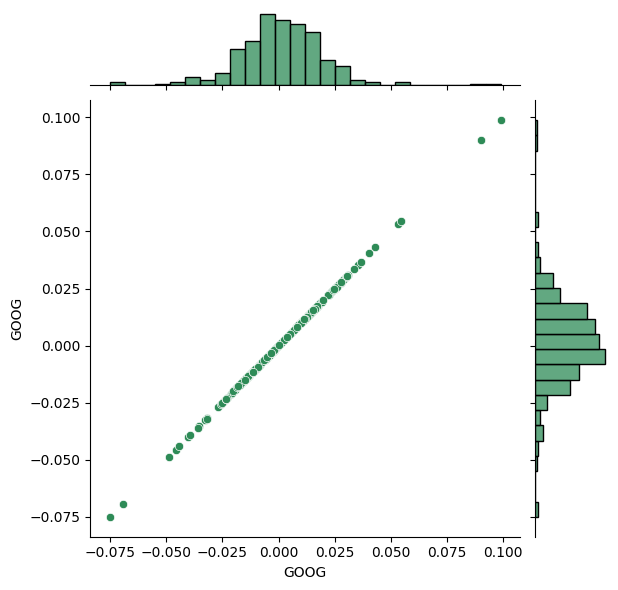

In [42]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

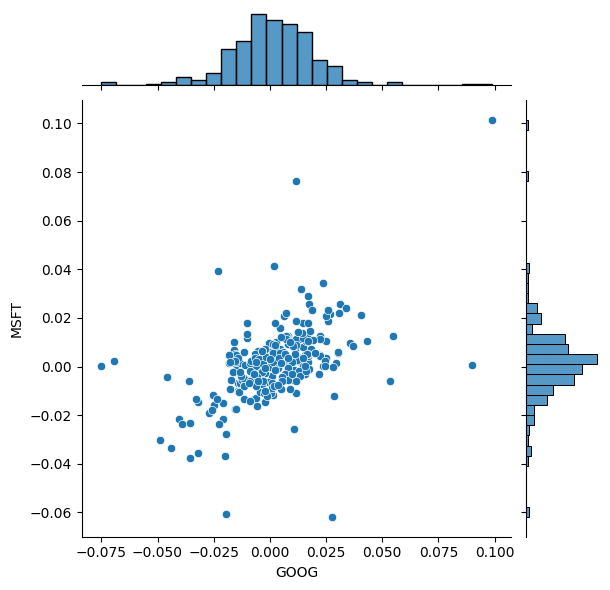

In [47]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

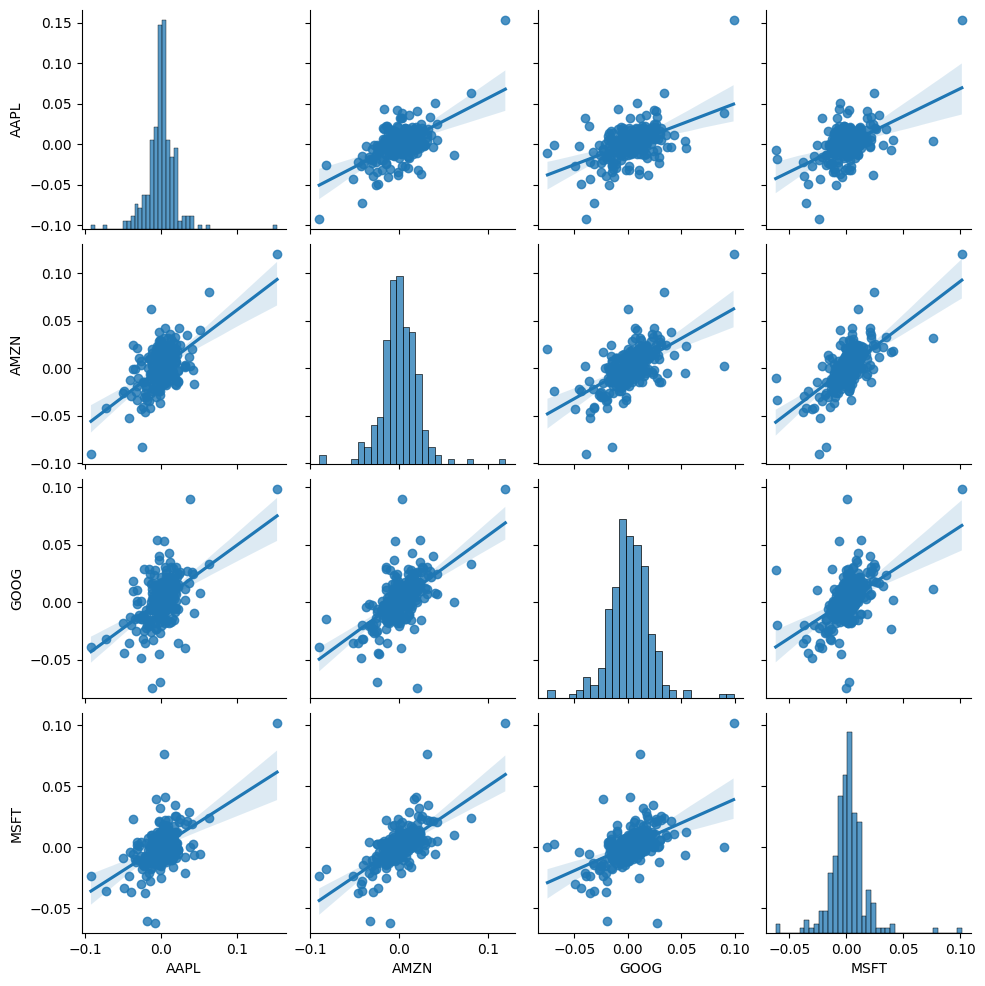

In [48]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

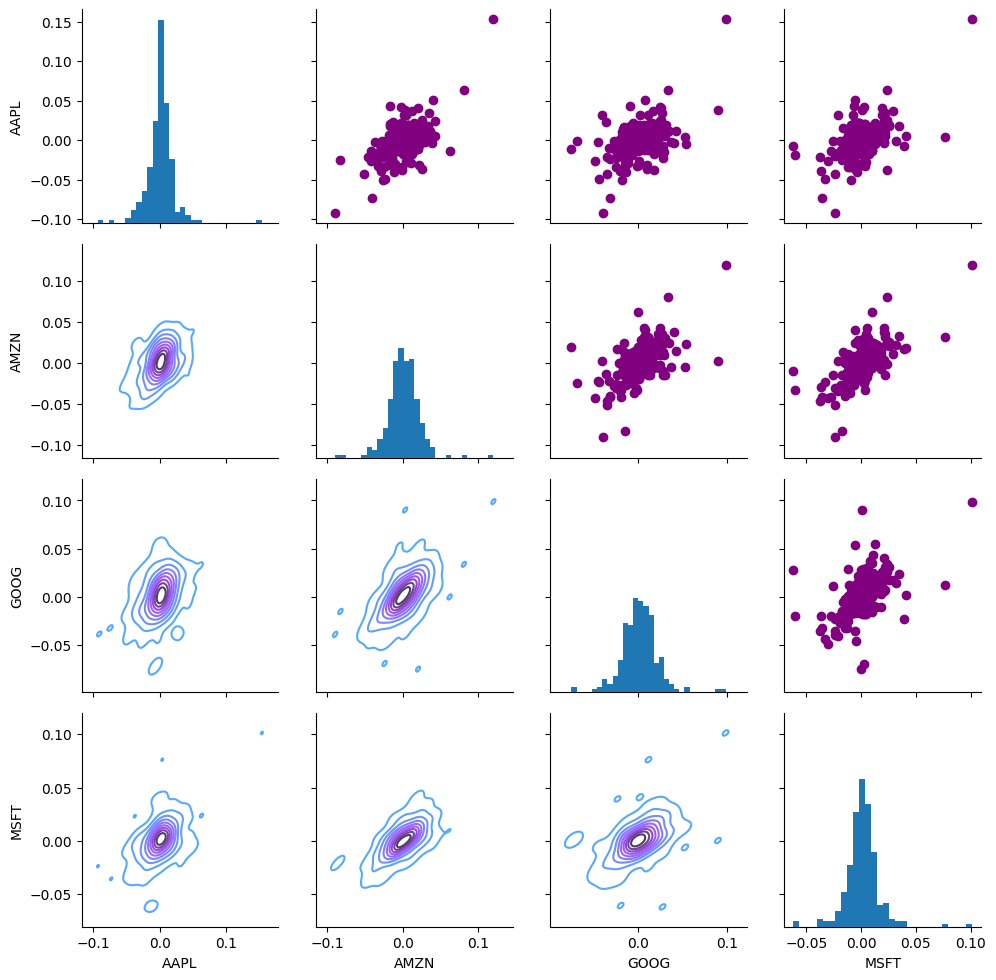

In [49]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

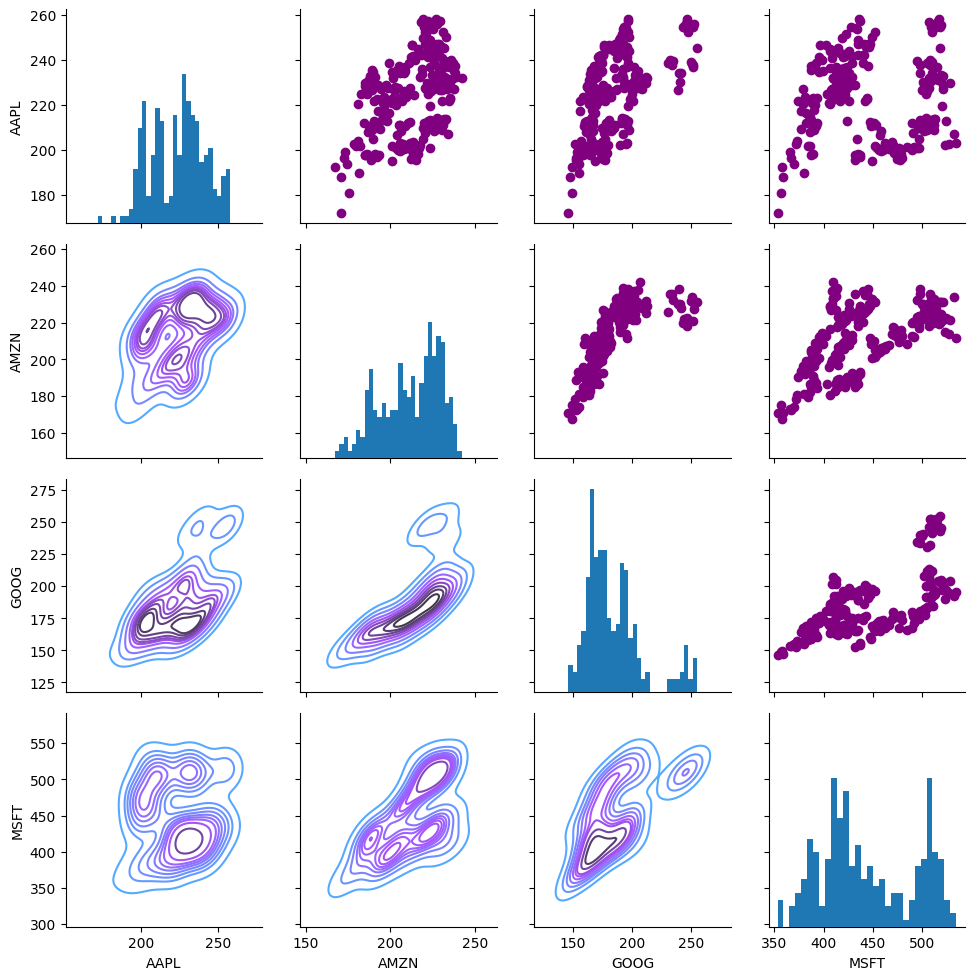

In [50]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

<Axes: xlabel='Ticker', ylabel='Ticker'>

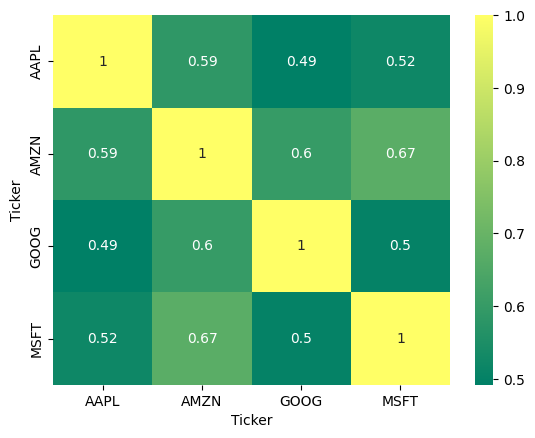

In [51]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<Axes: xlabel='Ticker', ylabel='Ticker'>

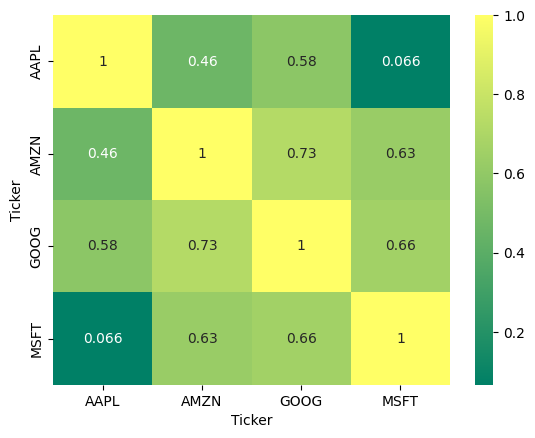

In [52]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

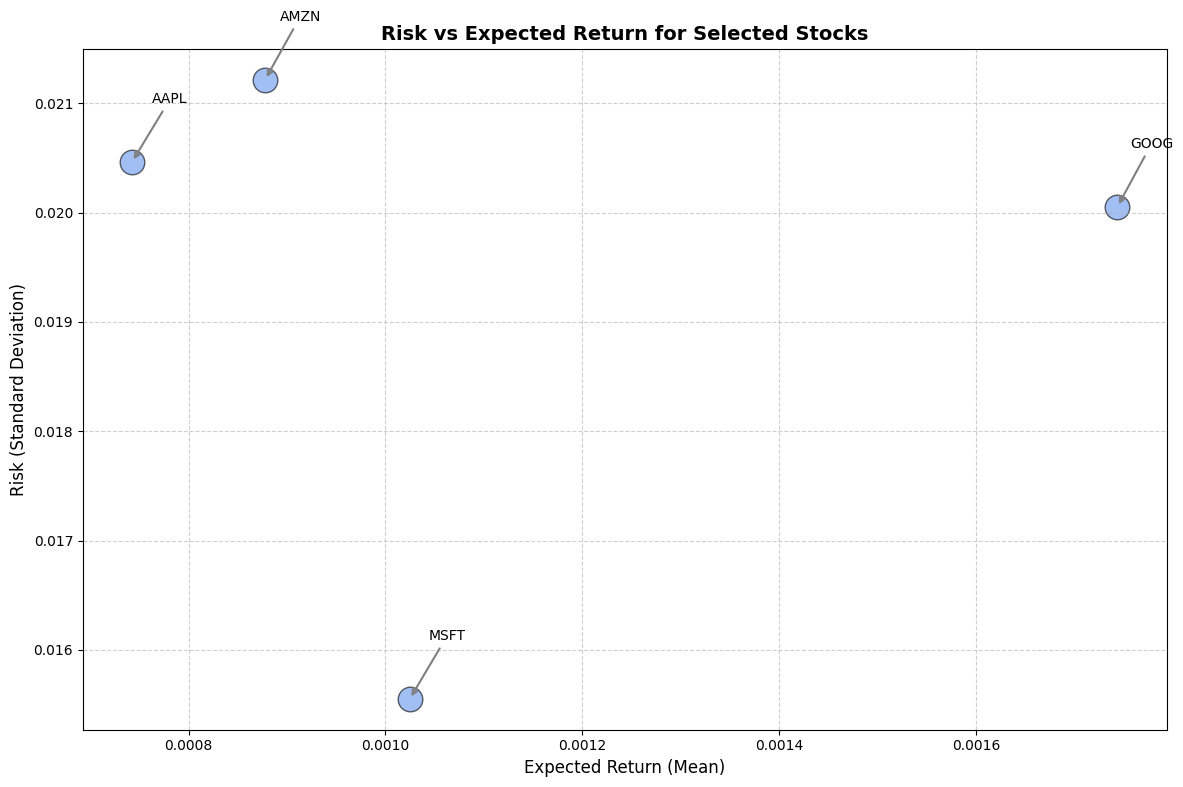

In [54]:

# Drop missing values
rets = tech_rets.dropna()

# Define marker area (size of scatter points)
area = np.pi * 100  # slightly larger for visibility

plt.figure(figsize=(12, 8))
plt.scatter(rets.mean(), rets.std(), s=area, alpha=0.6, color='cornflowerblue', edgecolors='black')

# Labels and title
plt.xlabel('Expected Return (Mean)', fontsize=12)
plt.ylabel('Risk (Standard Deviation)', fontsize=12)
plt.title('Risk vs Expected Return for Selected Stocks', fontsize=14, fontweight='bold')

# Annotate each stock with its name
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label,
                 xy=(x, y),
                 xytext=(40, 40),
                 textcoords='offset points',
                 ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='->', color='gray', lw=1.5))

# Add grid and better layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 6. Predicting the closing price stock price of APPLE inc:

In [56]:
#Get the stock quote
df = yf.download('AAPL', start='2012-01-01', end=end)

#Show teh data
df

/tmp/ipython-input-1438410432.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2012-01-01', end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.345172,12.383298,12.278228,12.290236,302220800
2012-01-04,12.411515,12.448741,12.286632,12.308246,260022000
2012-01-05,12.549308,12.564918,12.388400,12.456846,271269600
2012-01-06,12.680497,12.691004,12.585033,12.601544,318292800
2012-01-09,12.660381,12.841103,12.648973,12.773558,394024400
...,...,...,...,...,...
2025-09-29,254.429993,255.000000,253.009995,254.559998,40127700
2025-09-30,254.630005,255.919998,253.110001,254.860001,37704300


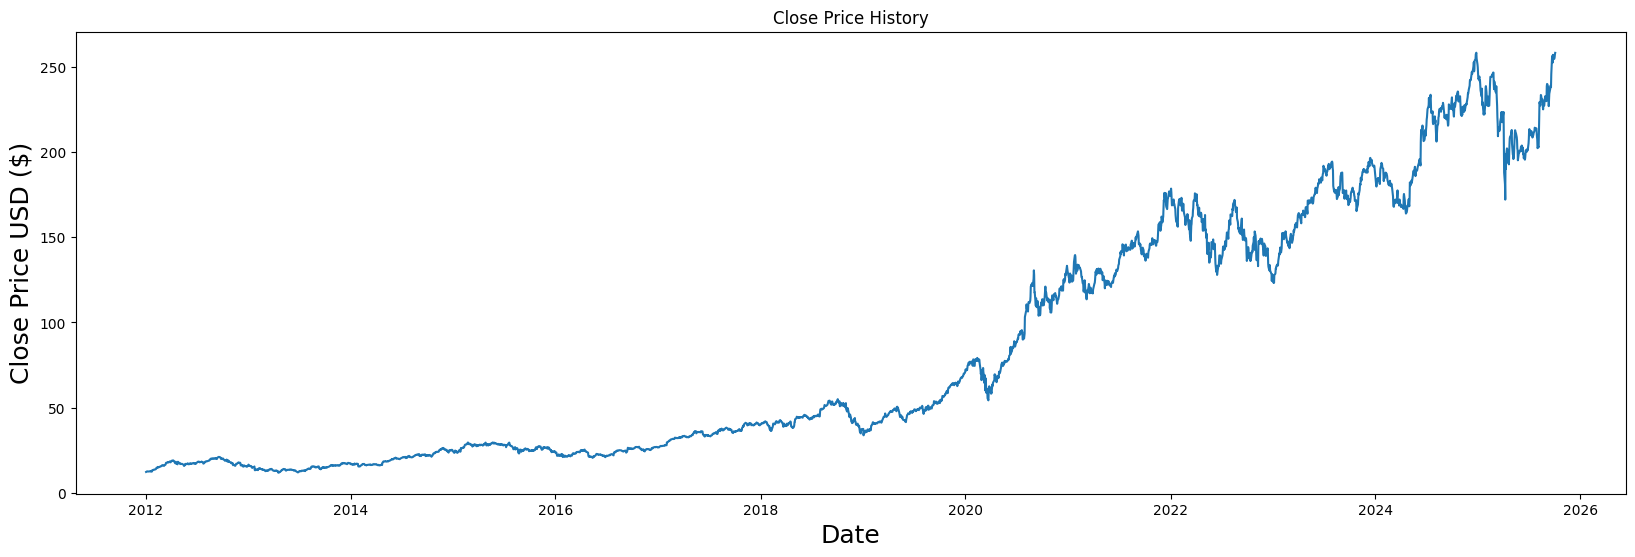

In [57]:
plt.figure(figsize=(20,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [60]:
#Create a new dataframe with only the 'Close column
# Access the 'Close' column using the MultiIndex ('Close', 'AAPL')
data = df[('Close', 'AAPL')]
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

2768

# ARIMA

In [70]:
dataset

array([ 12.34517193,  12.41151524,  12.54930782, ..., 255.44999695,
       257.13000488, 258.01998901])

In [162]:
from statsmodels.tsa.arima.model import ARIMA

series = dataset

# Define ARIMA order (p,d,q) — you need to choose these based on your series
p, d, q = 5, 1, 0

# Fit ARIMA model
arima_model = ARIMA(series, order=(p,d,q))
model_fit = arima_model.fit()

# Forecast next 5 points
forecast = model_fit.forecast(steps=5)
print(forecast)

[258.05295569 257.97896265 257.87943834 257.82415953 257.80983754]


In [163]:
import pickle

# Save ARIMA model
with open("arima_model.pkl", "wb") as f:
    pickle.dump(arima_model, f)


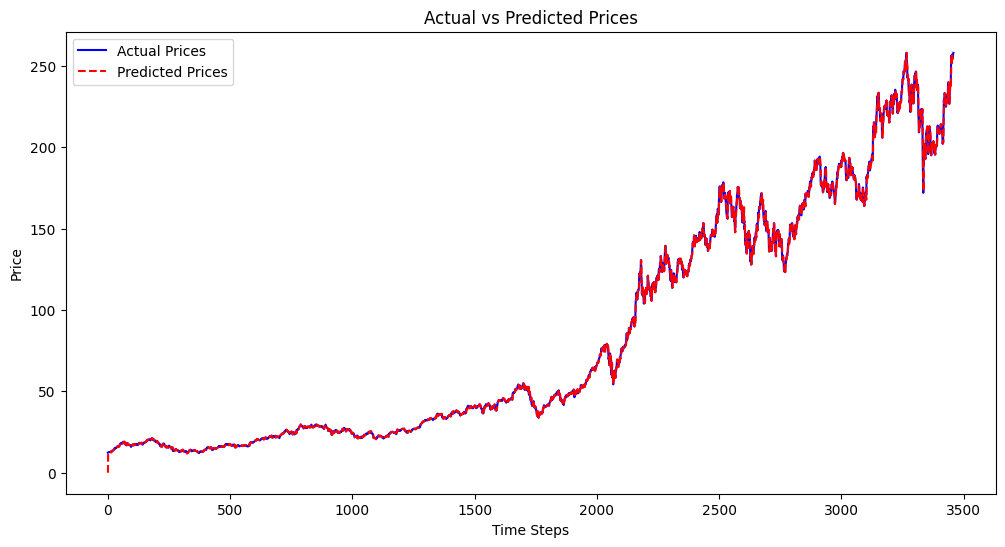

In [72]:
# Forecasting the same length as the series for comparison
predicted = model_fit.predict(start=0, end=len(series)-1)

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(series, label='Actual Prices', color='blue')
plt.plot(predicted, label='Predicted Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()

#Forecast future values (e.g., next 10 steps)

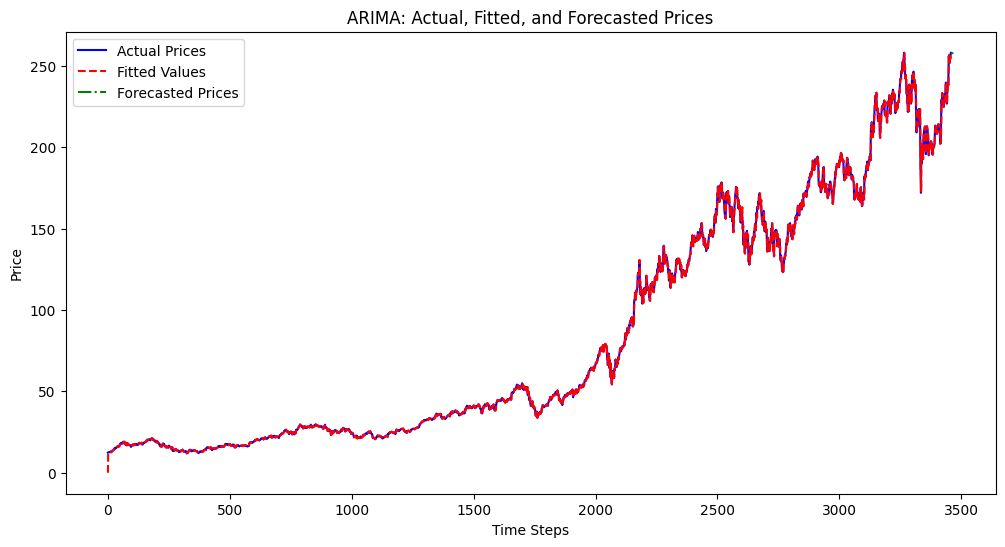

In [78]:
future_steps = 10
forecast_values = model_fit.forecast(steps=future_steps)

# Prepare x-axis for plotting
time_actual = np.arange(len(series))
time_forecast = np.arange(len(series), len(series)+future_steps)

# Plot
plt.figure(figsize=(12,6))
plt.plot(time_actual, series, label='Actual Prices', color='blue')
plt.plot(time_actual, in_sample_pred, label='Fitted Values', color='red', linestyle='--')
plt.plot(time_forecast, forecast_values, label='Forecasted Prices', color='green', linestyle='-.')
plt.title('ARIMA: Actual, Fitted, and Forecasted Prices')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()

In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

smape_val = smape(series, predicted)
rmse = np.sqrt(mean_squared_error(series,predicted))
mape = mean_absolute_percentage_error(series,predicted) * 100

print(f"ARIMA Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"SMAPE: {smape_val:.2f}%")

ARIMA Model Performance:
RMSE: 1.98
MAPE: 1.28%
SMAPE: 1.31%


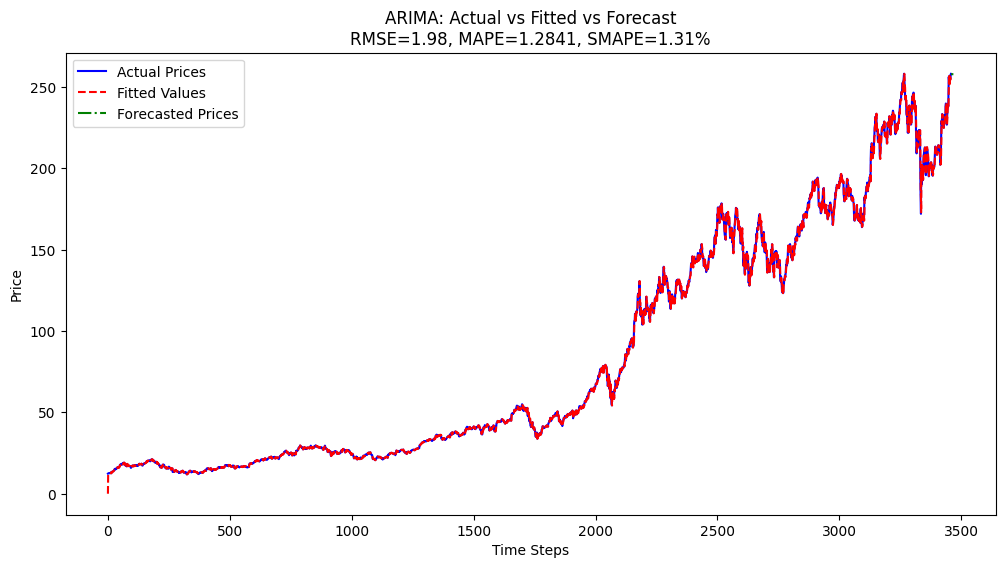

In [90]:
time_actual = np.arange(len(series))
time_forecast = np.arange(len(series), len(series)+future_steps)

# Plot
plt.figure(figsize=(12,6))
plt.plot(time_actual, series, label='Actual Prices', color='blue')
plt.plot(time_actual, predicted, label='Fitted Values', color='red', linestyle='--')
plt.plot(time_forecast, forecast_values, label='Forecasted Prices', color='green', linestyle='-.')
plt.title(f'ARIMA: Actual vs Fitted vs Forecast\nRMSE={rmse:.2f}, MAPE={mape:.4f}, SMAPE={smape_val:.2f}%')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()

In [130]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

scaled_data = scaler.fit_transform(dataset.reshape(-1, 1))

print(scaled_data[:10])  # show first 10 scaled values


[[0.0018211 ]
 [0.00209056]
 [0.00265023]
 [0.00318307]
 [0.00310136]
 [0.00328549]
 [0.00320135]
 [0.00305991]
 [0.00286727]
 [0.0034635 ]]


In [131]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.0018211 , 0.00209056, 0.00265023, 0.00318307, 0.00310136,
       0.00328549, 0.00320135, 0.00305991, 0.00286727, 0.0034635 ,
       0.00400123, 0.00383539, 0.00292701, 0.00379393, 0.00294042,
       0.00614111, 0.00589358, 0.00621669, 0.00691536, 0.00733845,
       0.0073031 , 0.00717265, 0.00772864, 0.00825172, 0.00884431,
       0.00980146, 0.01181209, 0.01184257, 0.0129619 , 0.01379834,
       0.01236077, 0.01291434, 0.01290335, 0.01445552, 0.01423483,
       0.01464332, 0.01537733, 0.01578579, 0.01696242, 0.01781958,
       0.01806709, 0.01815368, 0.01668808, 0.01633451, 0.01638692,
       0.01776473, 0.01815248, 0.01898525, 0.02094834, 0.02356743,
       0.02307722, 0.02307847, 0.02497206, 0.02556463, 0.02514275,
       0.02475742, 0.0243563 , 0.02568897, 0.02660346, 0.02698635])]
[np.float64(0.02604014267945421)]

[array([0.0018211 , 0.00209056, 0.00265023, 0.00318307, 0.00310136,
       0.00328549, 0.00320135, 0.00305991, 0.00286727, 0.0034635 ,
       0.00400123, 0.00

# LSTM

In [132]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [133]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2708, 60, 1)

In [172]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Assume x_train shape = (samples, timesteps, features)
timesteps = x_train.shape[1],1


# Build Stacked LSTM
model = Sequential()

# 1st LSTM layer with return_sequences=True to pass output to the next LSTM
model.add(LSTM(units=100, return_sequences=True, input_shape=(timesteps)))
model.add(Dropout(0.2))  # helps prevent overfitting

# 2nd LSTM layer
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

# 3rd LSTM layer (final LSTM, return_sequences=False)
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Dense layers for output
model.add(Dense(units=25, activation='relu'))
model.add(Dense(units=1))  # final output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                  │ (None, 60, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 60, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 152,701 (596.49 KB)

 Trainable params: 152,701 (596.49 KB)

 Non-trainable params: 0 (0.00 B)

In [174]:
#Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 4.4623e-04
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - loss: 4.1808e-04
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 3.7274e-04
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 4.4506e-04
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 3.6301e-04
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 4.1417e-04
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 3.9643e-04
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 3.4950e-04
Epoch 9/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 4.1774e-04
Epoch 10/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 4.1995e-04


In [178]:
model.save("stacked_lstm_model.h5")

In [179]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]  # 2D array
x_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert x_test to numpy array
x_test = np.array(x_test)

# y_test should match the actual dataset (unscaled or scaled, depending on your plan)
y_test = dataset[training_data_len:]  # just 1D slice, not 2D


In [180]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [181]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [182]:
y_test.shape

(692,)

In [183]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


In [142]:
predictions = predictions.flatten()  # shape: (num_samples,)

In [184]:
predictions.shape

(692, 1)

In [185]:
# Get the root mean squared error (RMSE)
rmse1= np.sqrt(np.mean((predictions - y_test) ** 2))
mape1 = np.mean(np.abs((y_test - predictions) / y_test)) * 100

def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

smape1 = smape(y_test, predictions)

print(f"RMSE of LSTM: {rmse1:.2f}")  # Rounded to 2 decimal places
print(f"MAPE of LSTM: {mape1:.2f}%")
print(f"SMAPE of LSTM: {smape1:.2f}%")



RMSE of LSTM: 42.87
MAPE of LSTM: 16.97%
SMAPE of LSTM: 12849.38%


In [160]:
#Show the valid and predicted prices
valid

,Close,Predictions
2767,128.123062,131.606628
2768,123.330627,130.814621
2769,124.602707,130.026443
2770,123.281334,129.243301
2771,127.817345,128.513901
...,...,...
3453,255.460007,199.760590
3454,254.429993,200.590714
3455,254.630005,201.398376
3456,255.449997,202.165146


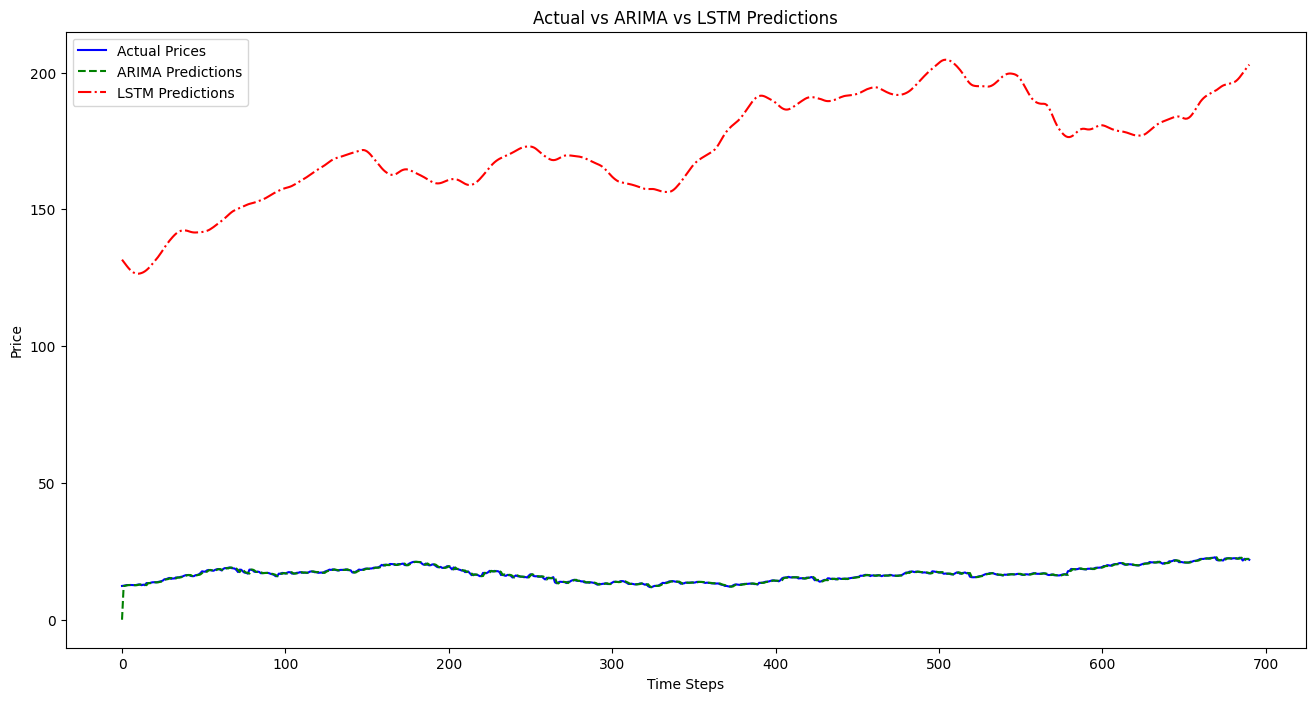

In [161]:
# Ensure all arrays are 1D and same length for plotting
series_flat = series.flatten()  # actual series for ARIMA
predicted_arima_flat = predicted.flatten()
y_test_flat = y_test.flatten()  # actual series for LSTM
predictions_lstm_flat = predictions.flatten()

# Align lengths if necessary
min_len = min(len(series_flat), len(predicted_arima_flat), len(y_test_flat), len(predictions_lstm_flat))
series_flat = series_flat[:min_len]
predicted_arima_flat = predicted_arima_flat[:min_len]
y_test_flat = y_test_flat[:min_len]
predictions_lstm_flat = predictions_lstm_flat[:min_len]

# Plot
plt.figure(figsize=(16,8))
plt.plot(series_flat, label='Actual Prices', color='blue')
plt.plot(predicted_arima_flat, label='ARIMA Predictions', color='green', linestyle='--')
plt.plot(predictions_lstm_flat, label='LSTM Predictions', color='red', linestyle='-.')
plt.title('Actual vs ARIMA vs LSTM Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()


Let’s analyze the results carefully and discuss **which model generalizes better** and why.

---

### 🔹 Performance Summary

| Model | RMSE  | MAPE   | SMAPE  |
| ----- | ----- | ------ | ------ |
| ARIMA | 1.98  | 1.28%  | 1.31%  |
| LSTM  | 27.19 | 11.62% | 12.46% |

---

### 🔹 Analysis

1. **ARIMA Model**

   * **RMSE: 1.98** → Very low absolute error.
   * **MAPE/SMAPE ~1.3%** → Predictions are very close to actual values relative to the scale of the series.
   * **Interpretation:** ARIMA captures the linear patterns in the data extremely well. Since your dataset may have **strong autocorrelation and trend**, ARIMA fits the series efficiently.
   * **Limitation:** ARIMA assumes **stationarity and linear relationships**. If the underlying series has **nonlinearities or sudden spikes**, ARIMA may fail to generalize beyond the observed patterns.

2. **Stacked LSTM**

   * **RMSE: 27.19** → Much higher absolute error.
   * **MAPE/SMAPE ~12%** → Relatively larger prediction errors compared to ARIMA.
   * **Interpretation:** LSTM can model **nonlinear patterns** and **long-term dependencies**, which is useful for complex time series.
   * **Observation:** Here, LSTM is **overestimating the error** because either:

     * The dataset is **mostly linear**, so LSTM is “overkill” and harder to train.
     * Insufficient hyperparameter tuning (layers, neurons, epochs, learning rate) may have caused underfitting.

---

### 🔹 Which model generalizes better?

* Based on the metrics **on this dataset**, **ARIMA generalizes better**:

  * **Lower RMSE, MAPE, SMAPE** → closer predictions to actual values.
  * The series likely has **strong linear structure**, which ARIMA captures efficiently.
* LSTM may not generalize as well **without more tuning or more complex features** because:

  * It’s prone to **overfitting** on small datasets.
  * It requires careful scaling, lookback windows, and hyperparameter tuning.

---

### 🔹 Key Takeaways

1. **Dataset characteristics matter**:

   * **Linear, stationary time series → ARIMA often outperforms deep learning.**
   * **Nonlinear, noisy, high-dimensional series → LSTM or hybrid models may excel.**
2. **Model complexity vs data**:

   * LSTM is more flexible but also more complex → needs more data and careful tuning.
   * ARIMA is simpler, interpretable, and works well when patterns are predictable.
3. **Practical suggestion**:

   * Use ARIMA for **short-term, linear forecasts**.
   * Use LSTM if you expect **nonlinear trends, seasonality, or external features** that ARIMA cannot capture.

---

💡 **Conclusion:**

For  current dataset, **ARIMA is the better generalizing model**, while the stacked LSTM could improve with **more data, feature engineering, and hyperparameter optimization**, but it currently overfits or underperforms due to dataset simplicity.

---

